In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import glob
import geopandas as gp
plt.rcParams['figure.figsize'] = (12,9)
plt.rcParams['figure.facecolor']='w'
import warnings
warnings.filterwarnings('ignore')

In [2]:
def get_area_n(fname):
    """
    returns community area number
    """

    comm_n = fname.split('_')[2]

    return int(comm_n)


get_comm_area = lambda c: int(c.split('_')[1])

get_census_tract = lambda n: int(str(n)[:-4])

In [3]:
chicago_shp = '../data_misc/chicago_shapefile/geo_export_ec346dbb-8c11-44b4-be04-0301ae3f9c64.shp'
chicago = gp.read_file(chicago_shp)
cols = ['countyfp10','namelsad10', 'name10','notes','statefp10','tractce10']
chicago.drop(columns=cols, inplace=True)
chicago.geoid10 = chicago.geoid10.apply(np.int64)

In [4]:
parks = gp.read_file('kx-chicago-illinois-parks-SHP/chicago-illinois-parks.shp')
parks.to_crs({'init': 'epsg:4326'},inplace=True)

In [5]:
chi_copy = chicago.copy()
chi_copy = chi_copy.to_crs(epsg=6933)
chi_copy['area'] = chi_copy.geometry.area/1e6
chicago['tract_area'] = chi_copy['area']

parkjoin = gp.overlay(chicago, parks[['geometry']], how='intersection')

In [6]:
parkjoin

,commarea,commarea_n,geoid10,tract_area,geometry
0,44,44.0,17031842400,1.968638,"POLYGON ((-87.62943 41.74552, -87.62943 41.745..."
1,59,59.0,17031840300,0.831225,"POLYGON ((-87.67888 41.83208, -87.67790 41.832..."
2,34,34.0,17031841100,1.143245,"POLYGON ((-87.63356 41.84818, -87.63355 41.847..."
3,34,34.0,17031841100,1.143245,"POLYGON ((-87.63674 41.85512, -87.63690 41.855..."
4,33,33.0,17031330200,0.790504,"MULTIPOLYGON (((-87.63352 41.85803, -87.63345 ..."
...,...,...,...,...,...
652,7,7.0,17031070200,0.341405,"POLYGON ((-87.64795 41.92869, -87.64821 41.928..."
653,7,7.0,17031070400,0.324370,"POLYGON ((-87.65385 41.92892, -87.65383 41.928..."
654,7,7.0,17031070500,0.305416,"POLYGON ((-87.65910 41.92819, -87.65867 41.928..."
655,13,13.0,17031130300,0.721100,"POLYGON ((-87.71259 41.98857, -87.71264 41.990..."


In [7]:
print('Calculating park area... ')
parks_copy = parkjoin.copy()
parks_copy = parks_copy.to_crs(epsg=6933)
parks_copy['park_area'] = parks_copy.geometry.area/1e6
parkjoin['park_area'] = parks_copy['park_area']

Calculating park area... 


In [8]:
parkjoin

,commarea,commarea_n,geoid10,tract_area,geometry,park_area
0,44,44.0,17031842400,1.968638,"POLYGON ((-87.62943 41.74552, -87.62943 41.745...",0.055850
1,59,59.0,17031840300,0.831225,"POLYGON ((-87.67888 41.83208, -87.67790 41.832...",0.008148
2,34,34.0,17031841100,1.143245,"POLYGON ((-87.63356 41.84818, -87.63355 41.847...",0.001804
3,34,34.0,17031841100,1.143245,"POLYGON ((-87.63674 41.85512, -87.63690 41.855...",0.026215
4,33,33.0,17031330200,0.790504,"MULTIPOLYGON (((-87.63352 41.85803, -87.63345 ...",0.042620
...,...,...,...,...,...,...
652,7,7.0,17031070200,0.341405,"POLYGON ((-87.64795 41.92869, -87.64821 41.928...",0.000776
653,7,7.0,17031070400,0.324370,"POLYGON ((-87.65385 41.92892, -87.65383 41.928...",0.011539
654,7,7.0,17031070500,0.305416,"POLYGON ((-87.65910 41.92819, -87.65867 41.928...",0.001356
655,13,13.0,17031130300,0.721100,"POLYGON ((-87.71259 41.98857, -87.71264 41.990...",0.026270


In [9]:
pct_park = parkjoin[['geoid10','tract_area', 'park_area']]
pct_park.geoid10 = pct_park.geoid10.apply(np.int64)
pct_park['pct_park'] = np.divide(pct_park['park_area'],pct_park['tract_area'])
pct_park = pct_park.groupby('geoid10').sum().reset_index()
# pct_park.set_index('geoid10', inplace=True)

In [10]:
pct_park

,geoid10,tract_area,park_area,pct_park
0,17031010100,1.905311,0.033417,0.087695
1,17031010201,0.504471,0.038231,0.075785
2,17031010202,0.703440,0.027103,0.077060
3,17031010300,2.360096,0.016135,0.034183
4,17031010400,6.908112,0.188431,0.163661
...,...,...,...,...
447,17031843200,9.486180,0.034130,0.010794
448,17031843600,0.410893,0.001018,0.002478
449,17031843700,2.526139,0.125771,0.099576
450,17031843800,1.309514,0.015767,0.012040


In [11]:
chicago.columns

Index(['commarea', 'commarea_n', 'geoid10', 'geometry', 'tract_area'], dtype='object')

In [12]:
pct_park.columns

Index(['geoid10', 'tract_area', 'park_area', 'pct_park'], dtype='object')

In [13]:
# merging chicago and park area
print('Merging Chicago shapefile and park area')
len_before = len(chicago)
n_cols_before = len(chicago.columns)
chicago = chicago.merge(pct_park[['pct_park', 'geoid10']], on='geoid10', how='left')
chicago['pct_park'].fillna(0, inplace=True)
len_after = len(chicago)
n_cols_after = len(chicago.columns)
print(f'Expecting {len_before} rows, got {len_after} rows.')
print(f'Expecting {n_cols_before+1} columns {n_cols_after}\n')

Merging Chicago shapefile and park area
Expecting 801 rows, got 801 rows.
Expecting 6 columns 6



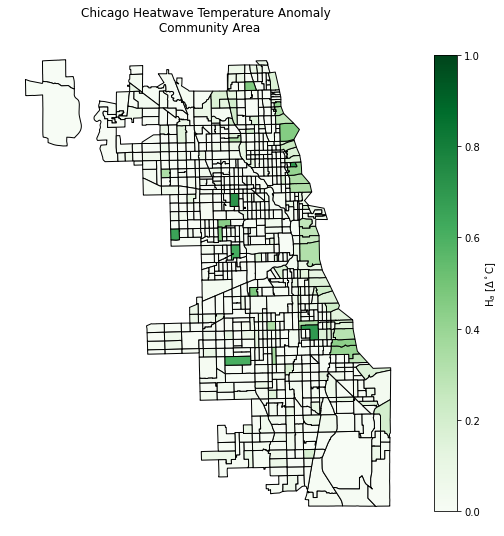

In [18]:
import matplotlib.colors as colors
fig, ax = plt.subplots(figsize=(9,12))
norm = colors.Normalize(vmin=0, vmax=1)
cmap = 'Greens'
cbar = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
# chicago.plot(ax=ax, color='w',edgecolor='k', legend=False)
chicago.plot(ax=ax, edgecolor='k',column='pct_park', norm=norm, cmap=cmap, legend=False)
ax_cbar = fig.colorbar(cbar, ax=ax, shrink=0.7)
ax_cbar.set_label(r'H$_a$ [$\Delta^\circ$C]')
# counties.centroid.plot(ax=ax, color='tab:red')
ax.set_title('Chicago Heatwave Temperature Anomaly \n Community Area')
ax.set_axis_off()
# plt.savefig('../chicago-solar/paper/figures/temperature_anomaly_map.eps', format='eps')